In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

### Tasks, Part I

**Find the linear regression equation for mileage(x) vs price(y).**

In [95]:
car_data = pd.read_csv("car_data.csv")

In [116]:
car_data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [97]:
price_v_mileage = car_data[['Mileage', 'Price']]

In [98]:
mileage_price = pd.DataFrame(price_v_mileage)

In [99]:
mileage = np.array(mileage_price[['Mileage']])
price = np.array(mileage_price[['Price']])

In [100]:
mileage_price_reg = linear_model.LinearRegression()

In [101]:
mileage_price_reg.fit(mileage, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
print("The linear regression equation for mileage vs. price is 'price = {} * mileage + {} .".format(mileage_price_reg.coef_[0], mileage_price_reg.intercept_[0]))

The linear regression equation for mileage vs. price is 'price = [-0.1725205] * mileage + 24764.55900606168 .


**Chart the original data and the equation on the chart.**

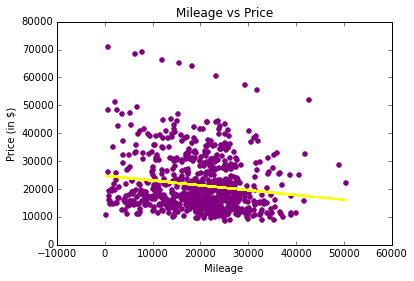

In [103]:
plt.scatter(mileage, price, color='purple')
plt.plot(mileage, mileage_price_reg.predict(mileage), color='yellow', linewidth=2)
plt.xlabel('Mileage')
plt.ylabel('Price (in $)')
plt.title('Mileage vs Price')
plt.show()

**Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data.   (0.8 and greater is considered a strong correlation.)**


In [104]:
print("The equation's R2 score is {}. Since the R2 score is not greater than .8, this is not a good fit for this data".format(round(mileage_price_reg.score(mileage, price), 3)))

The equation's R2 score is 0.02. Since the R2 score is not greater than .8, this is not a good fit for this data


### Tasks, Part 2

**Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.**

In [118]:
features = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

In [106]:
input_data = car_data[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]

In [107]:
output_data = price

In [108]:
multi_var_reg = linear_model.LinearRegression()

In [109]:
multi_var_reg.fit(input_data, output_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
print(multi_var_reg.coef_, multi_var_reg.intercept_)

[[ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
    6.28899715e+03  -1.99379528e+03   3.34936162e+03]] [ 6758.7551436]


**Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data.   (0.8 and greater is considered a strong correlation.)**


In [111]:
print(multi_var_reg.score(input_data, output_data))

0.446264353673


In [112]:
print("The equation is not a good fit for the data, due to having an R2 score of {}, which is far under .8.".format(multi_var_reg.score(input_data, output_data)))

The equation is not a good fit for the data, due to having an R2 score of 0.4462643536728379, which is far under .8.


In [121]:
combos = []
for combo in range(len(features)):
    combos.append(list(itertools.combinations(features, combo)))

print(len(combos))

7


In [114]:
 = 

SyntaxError: invalid syntax (<ipython-input-114-68fdfada9783>, line 1)